In [1]:
#ignore warning jika muncul
import warnings
warnings.filterwarnings('ignore')

#import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#install kaggle package
!pip install -q kaggle

In [3]:
#buat directory baru bernama .kaggle di home directory(~)
!mkdir ~/.kaggle

In [4]:
#copy file kaggle API ke .kaggle directory
!cp kaggle.json ~/.kaggle

In [5]:
#set izin yang sesuai pada API key yang disalin utk memastikan hanya pemilik yg membaca
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
#download dataset carrie1/ecommerce-data dari kaggle
!kaggle datasets download -d 'carrie1/ecommerce-data'

 56% 4.00M/7.20M [00:00<00:00, 6.11MB/s]
100% 7.20M/7.20M [00:01<00:00, 7.24MB/s]


In [7]:
#import zipfile module yg berisi tools utk create, read, write, append, and list zip files.
import zipfile
#membuat objek zipFile dg nama dataset_zip. parameter 'r' berarti read
dataset_zip = zipfile.ZipFile('/content/ecommerce-data.zip','r')
#mengekstrak semua dataset_zip ke directory colab
dataset_zip.extractall()
#close zipfile
dataset_zip.close()

In [8]:
#import pandas library
import pandas as pd
#membaca csv file. 'ISO-8859-1' adalah jenis encoding utk memastikan karakter khusus diinterpretasikan dg benar
df = pd.read_csv('/content/data.csv',encoding='ISO-8859-1')
#tampilkan 5 baris df teratas
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
#menampikan shape jumlah baris dan kolom df
df.shape

(541909, 8)

In [10]:
#memeriksa df apakah ada nilai NaN/null. jika True maka akan di sum()
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
#memberikan info column, non-null count dan Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
#memberikan ringkasan statistik ttg distribusi data int/float pada df
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


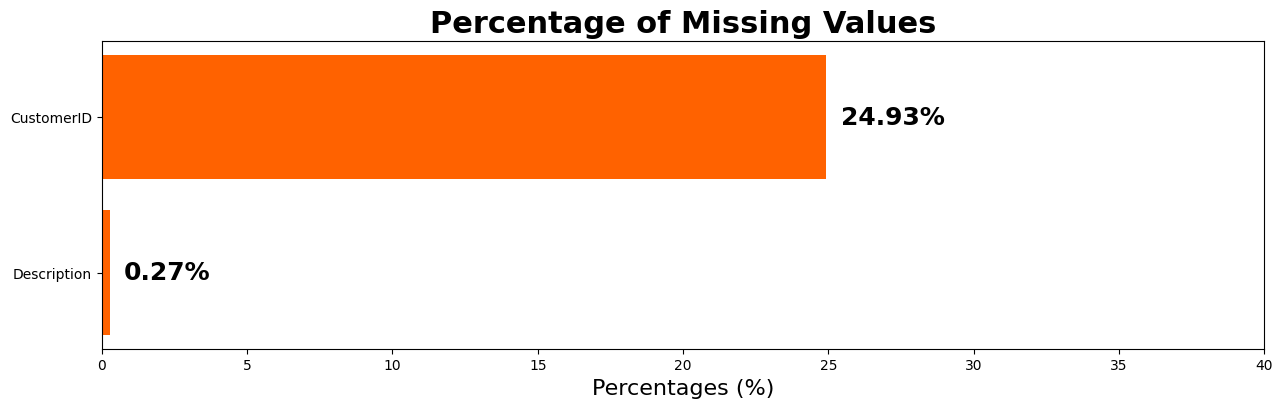

In [13]:
# Menghitung jumlah nilai yang hilang (NaN/null) dalam setiap kolom DataFrame
missing_data = df.isnull().sum()

# Menghitung persentase nilai yang hilang dari total jumlah entri dalam setiap kolom
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Menyiapkan nilai-nilai untuk plotting, mengurutkan persentase nilai yang hilang dari terkecil ke terbesar
missing_percentage.sort_values(ascending=True, inplace=True)

# Membuat objek subplot untuk diagram batang horizontal dengan ukuran gambar 15x4 inci
fig, ax = plt.subplots(figsize=(15, 4))

# Membuat diagram batang horizontal dengan menggunakan persentase nilai yang hilang
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Menambahkan teks anotasi untuk setiap bar yang menunjukkan persentase nilai yang hilang
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Mengatur batas sumbu-x dari 0 hingga 40
ax.set_xlim([0, 40])

# Menambahkan judul dan label sumbu-x pada diagram
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)

# Menampilkan diagram
plt.show()

In [14]:
#df awal berguna untuk menjadikan bentuk pandas dataframe
df[df['CustomerID'].isnull() | df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [15]:
# Menghapus baris-baris yang memiliki nilai NaN/null dalam kolom 'CustomerID' dan 'Description'
df = df.dropna(subset=['CustomerID','Description'])

In [16]:
#memeriksa df apakah ada nilai NaN/null. jika True maka akan di sum()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
# Mengembalikan bentuk (jumlah baris dan kolom) DataFrame setelah penghapusan nilai NaN/null
df.shape

(406829, 8)

In [18]:
# Mencari baris duplikat dalam DataFrame dan mempertahankan semua instance duplikat
duplicate_rows = df[df.duplicated(keep=False)]

# Mengurutkan data berdasarkan kolom-kolom tertentu untuk melihat baris duplikat berdampingan
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description',
                                                       'CustomerID', 'Quantity'])

# Menampilkan 10 baris pertama dari DataFrame yang berisi baris-baris duplikat
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In [19]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [20]:
# Menampilkan 10 baris pertama dari DataFrame yang berisi baris-baris duplikat
df.shape

(401604, 8)

# Treating Cancelled Transactions

In [21]:
# Menambahkan kolom baru bernama 'Transaction_Status' yang menunjukkan status transaksi berdasarkan InvoiceNo
# Jika InvoiceNo dimulai dengan "C", transaksi dianggap dibatalkan; jika tidak, dianggap selesai
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Menganalisis karakteristik dari baris-baris yang memiliki status transaksi "Cancelled"
# Dalam analisis ini, kolom 'CustomerID' diabaikan
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)



,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [22]:
# Menghitung persentase transaksi yang dibatalkan dalam keseluruhan dataset
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Mencetak persentase transaksi yang dibatalkan
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")


The percentage of cancelled transactions in the dataset is: 2.21%


# Correcting StockCode Anomalies

In [23]:
# Menghitung jumlah kode saham (stock codes) unik dalam dataset
unique_stock_codes = df['StockCode'].nunique()

# Mencetak jumlah kode Stock unik
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")


The number of unique stock codes in the dataset is: 3684


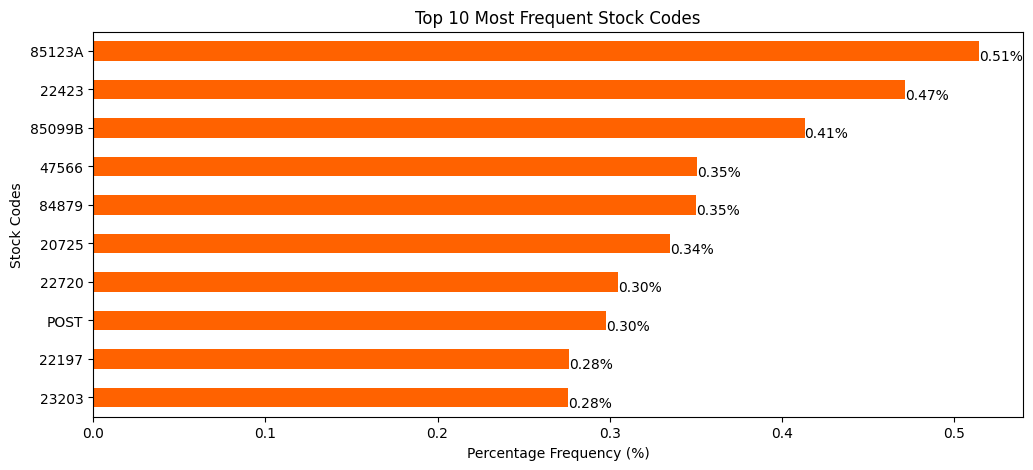

In [24]:
# Menghitung frekuensi relatif dari setiap kode saham dan mengambil 10 kode Stock teratas
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Membuat plot untuk menampilkan 10 kode Stock teratas yang paling sering muncul
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Menambahkan label persentase frekuensi pada batang diagram
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')

# Membalik sumbu y agar kode saham dengan frekuensi terbesar muncul di bagian atas
plt.gca().invert_yaxis()
plt.show()


In [25]:
# Mendapatkan array dari semua kode Stock unik dalam DataFrame
unique_stock_codes = df['StockCode'].unique()

# Menghitung jumlah karakter numerik dalam setiap kode Stock unik dan menghitung frekuensi kemunculannya
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Mencetak frekuensi kemunculan jumlah karakter numerik dalam setiap kode Stock unik
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)


Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
dtype: int64


In [26]:
# Mencari kode Stock yang memiliki 0 atau 1 karakter numerik
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Mencetak setiap kode Stock pada baris baru
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)


Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [27]:
# Menghitung persentase catatan yang memiliki kode Stock anomalous
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Mencetak persentase tersebut dengan format dua angka di belakang koma
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")


The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [28]:
# Menghapus baris-baris yang memiliki kode Stock anomalous dari dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [29]:
# Mengembalikan jumlah baris setelah penghapusan
df.shape[0]

399689

# Cleaning Description Column

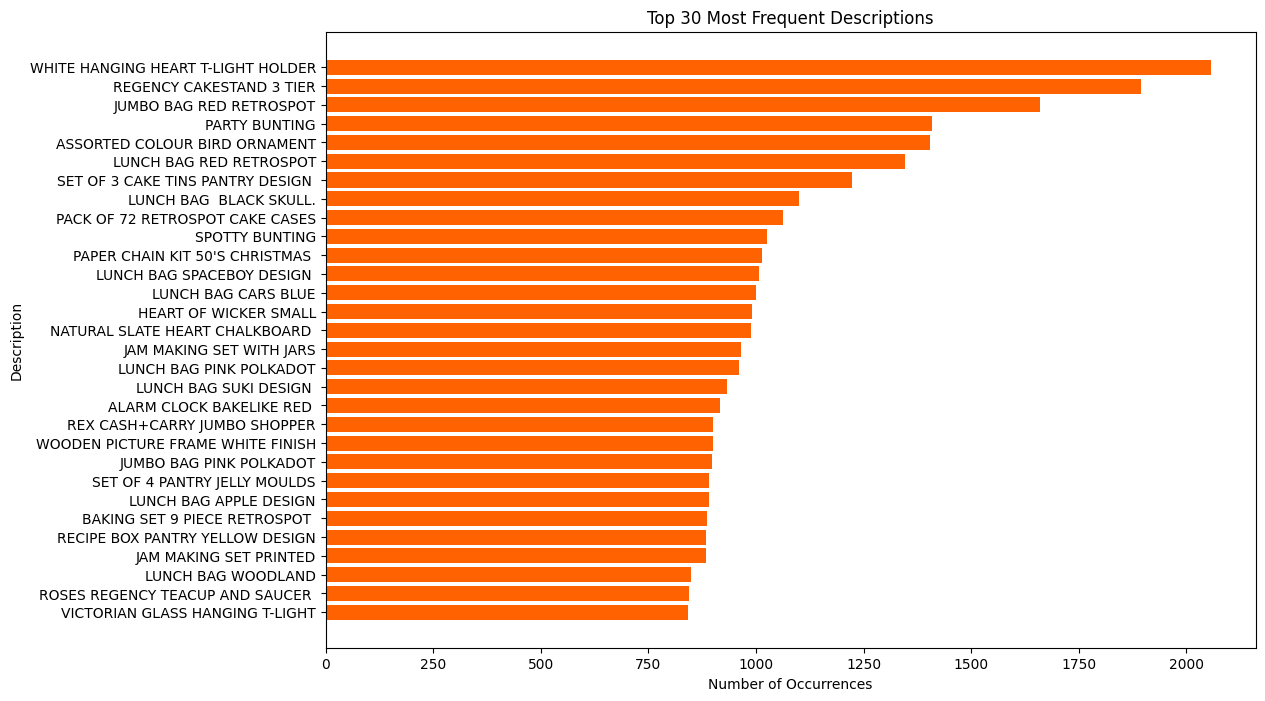

In [30]:
# Menghitung jumlah kemunculan setiap deskripsi unik dalam DataFrame dan mengurutkannya
description_counts = df['Description'].value_counts()

# Mengambil 30 deskripsi teratas berdasarkan jumlah kemunculannya
top_30_descriptions = description_counts[:30]

# Membuat plot dengan ukuran 12x8 inci
plt.figure(figsize=(12,8))

# Membuat diagram batang horizontal dengan menggunakan deskripsi teratas dan jumlah kemunculannya
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Menambahkan label sumbu x dan y serta judul
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Menampilkan plot
plt.show()


In [31]:
# Mengambil semua deskripsi unik dari DataFrame
lowercase_descriptions = df['Description'].unique()

# Membuat list yang berisi deskripsi unik yang mengandung setidaknya satu karakter huruf kecil
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Mencetak deskripsi unik yang mengandung karakter huruf kecil
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [32]:
# Mendefinisikan list deskripsi terkait layanan
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Menghitung persentase catatan dengan deskripsi terkait layanan
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Mencetak persentase catatan dengan deskripsi terkait layanan
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Menghapus baris dengan deskripsi terkait layanan
df = df[~df['Description'].isin(service_related_descriptions)]

# Menstandarisasi teks deskripsi menjadi huruf besar
df['Description'] = df['Description'].str.upper()


The percentage of records with service-related descriptions in the dataset is: 0.02%


In [33]:
# Mengembalikan jumlah baris setelah penghapusan
df.shape[0]

399606

# Treating Zero Unit Prices

In [34]:
# Menampilkan ringkasan statistik deskriptif untuk kolom 'UnitPrice'
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [35]:
# Menampilkan ringkasan statistik deskriptif untuk baris-baris di mana 'UnitPrice' sama dengan 0
df[df['UnitPrice']==0].describe()

,Quantity,UnitPrice,CustomerID
count,33.000000,33.0,33.000000
mean,420.515152,0.0,14252.575758
std,2176.713608,0.0,1659.811925
min,1.000000,0.0,12415.000000
25%,2.000000,0.0,13081.000000
50%,11.000000,0.0,13985.000000
75%,36.000000,0.0,14911.000000
max,12540.000000,0.0,18059.000000


In [36]:
# Menghapus baris-baris di mana 'UnitPrice' kurang dari atau sama dengan 0
df = df[df['UnitPrice'] > 0]

# Outlier Treatment
Dalam pengelompokan K-means, algoritme sensitif terhadap skala data dan keberadaan outlier, karena keduanya dapat memengaruhi posisi centroid secara signifikan, sehingga berpotensi menyebabkan penetapan klaster yang salah. Namun, mengingat konteks proyek ini yang tujuan akhirnya adalah memahami perilaku dan preferensi pelanggan melalui pengelompokan K-means, akan lebih bijaksana jika mengatasi masalah outlier setelah fase rekayasa fitur saat kami membuat kumpulan data yang berpusat pada pelanggan. Pada tahap ini, data bersifat transaksional, dan menghilangkan outlier mungkin menghilangkan informasi berharga yang dapat memainkan peran penting dalam mensegmentasi pelanggan di kemudian hari. Oleh karena itu, kami akan menunda penanganan outlier dan melanjutkan ke tahap berikutnya untuk saat ini.


In [37]:
# reset index dari dataset yg dibersihkan
df.reset_index(drop=True, inplace=True)

In [38]:
# Mendapatkan jumlah baris (transaksi) dalam DataFrame yang difilter
df.shape[0]

399573

# Feature Engineering
RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

**Recency (R)**: This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

**Frequency (F)**: This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

**Monetary (M)**: This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

### Recency

In [39]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [40]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


### Frequency

In [41]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


### Monetary

In [42]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


# Product diversity

In [43]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


# Behavioral Features

**Average Days Between Purchases:** This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

**Favorite Shopping Day:** This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

**Favorite Shopping Hour:** This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

In [44]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16


# Geographic Features

In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

Country: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [45]:
df['Country'].value_counts(normalize=True).head()
#normalize utk normalisasi antara 0 hingga 1


United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: Country, dtype: float64

Mengingat sebagian besar (89%) transaksi berasal dari Inggris, kami mungkin mempertimbangkan untuk membuat fitur biner yang menunjukkan apakah transaksi tersebut berasal dari Inggris atau tidak. Pendekatan ini berpotensi menyederhanakan proses pengelompokan tanpa kehilangan informasi geografis yang penting, terutama ketika mempertimbangkan penerapan algoritma seperti K-means yang sensitif terhadap dimensi ruang fitur.

### cara:
**Pertama**, saya akan mengelompokkan data berdasarkan ID Pelanggan dan Negara serta menghitung jumlah transaksi per negara untuk setiap pelanggan.

**kedua**, saya akan mengidentifikasi negara utama untuk setiap pelanggan (negara tempat mereka melakukan transaksi maksimum).

**Ketiga**, saya akan membuat kolom biner yang menunjukkan apakah pelanggan tersebut berasal dari Inggris atau bukan.

**Keempat**, saya akan menggabungkan informasi ini dengan kerangka data data_pelanggan untuk menyertakan fitur baru dalam analisis kami.

In [46]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')
#Fungsi size() digunakan untuk menghitung jumlah transaksi untuk setiap kombinasi CustomerID dan Country

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [47]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

1    3866
0     416
Name: Is_UK, dtype: int64

# Cancellation Insights

In [48]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0


#Seasonality & Trends

Pada langkah ini, saya akan mempelajari musim dan tren perilaku pembelian pelanggan, yang dapat memberikan wawasan berharga untuk menyesuaikan strategi pemasaran dan meningkatkan kepuasan pelanggan. Berikut adalah fitur yang ingin saya perkenalkan:

**Monthly_Spending_Mean**: Ini adalah jumlah
rata-rata yang dibelanjakan pelanggan setiap bulannya. Ini membantu kami mengukur kebiasaan belanja umum setiap pelanggan. Nilai rata-rata yang lebih tinggi menunjukkan pelanggan yang membelanjakan lebih banyak, sehingga berpotensi menunjukkan minat pada produk premium, sedangkan nilai rata-rata yang lebih rendah mungkin menunjukkan pelanggan yang lebih sadar anggaran.

**Monthly_Spending_Std**: Fitur ini menunjukkan variabilitas pembelanjaan bulanan pelanggan. Nilai yang lebih tinggi menandakan bahwa pembelanjaan pelanggan berfluktuasi secara signifikan dari bulan ke bulan, mungkin mengindikasikan pembelian dalam jumlah besar secara sporadis. Sebaliknya, nilai yang lebih rendah menunjukkan kebiasaan belanja yang lebih stabil dan konsisten. Memahami variabilitas ini dapat membantu dalam menyusun promosi atau diskon yang dipersonalisasi selama periode dimana mereka diperkirakan akan menghabiskan lebih banyak uang.

**Spending_Trend**: Ini mencerminkan tren pembelanjaan pelanggan dari waktu ke waktu, dihitung sebagai kemiringan garis tren linier yang disesuaikan dengan data pembelanjaan mereka. Nilai positif menunjukkan tren peningkatan pengeluaran, kemungkinan menunjukkan peningkatan loyalitas atau kepuasan. Sebaliknya, tren negatif mungkin menandakan penurunan minat atau kepuasan, sehingga menyoroti perlunya strategi keterlibatan kembali. Nilai yang mendekati nol menandakan kebiasaan belanja yang stabil. Mengenali tren ini dapat membantu dalam mengembangkan strategi untuk mempertahankan atau mengubah pola belanja pelanggan, sehingga meningkatkan efektivitas kampanye pemasaran.

In [49]:
from scipy.stats import linregress
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.0,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.0,294.400000,0.000000,0.000000


In [50]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [51]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635


In [52]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int64  
 9   Hour                            4282 non-null   Int64  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

# Outlier Detection and Treatment

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [53]:
from sklearn.ensemble import IsolationForest

# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


After applying the Isolation Forest algorithm, we have identified the outliers and marked them in a new column named Is_Outlier. We have also calculated the outlier scores which represent the anomaly score of each record.

Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

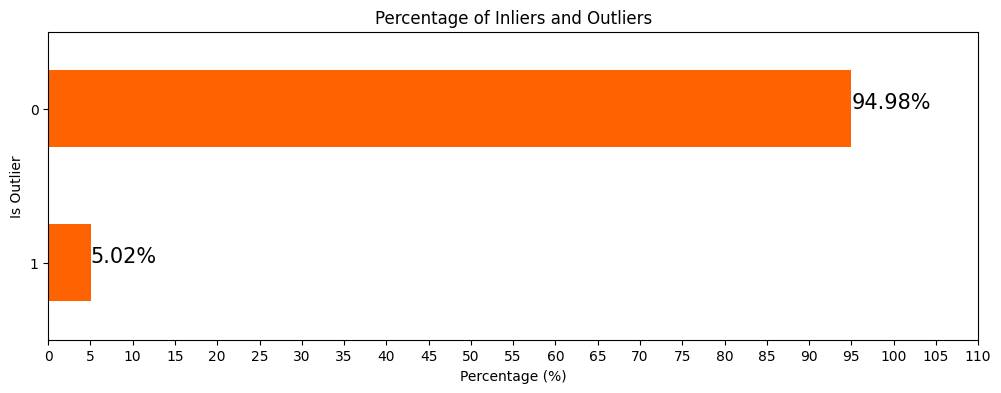

In [54]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

**Strategy:**
Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

1. Separate the identified outliers for further analysis and save them as a separate file (optional).

2. Remove the outliers from the main dataset to prevent them from influencing the clustering process.

3. Drop the Outlier_Scores and Is_Outlier columns as they were auxiliary columns used for the outlier detection process.

In [55]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [56]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

# Correlation Analysis
Sebelum kita melanjutkan ke pengelompokan KMeans, penting untuk memeriksa korelasi antar fitur dalam kumpulan data kita. Adanya multikolinearitas, yang mana fitur-fiturnya sangat berkorelasi, berpotensi mempengaruhi proses pengelompokan dengan tidak memungkinkan model mempelajari pola dasar sebenarnya dalam data, karena fitur-fitur tersebut tidak memberikan informasi unik. Hal ini dapat menyebabkan cluster tidak terpisah dengan baik dan bermakna.

Jika kita mengidentifikasi multikolinearitas, kita dapat menggunakan teknik reduksi dimensi seperti PCA. Teknik-teknik ini membantu menetralkan efek multikolinearitas dengan mengubah fitur-fitur yang berkorelasi menjadi sekumpulan variabel baru yang tidak berkorelasi, sehingga mempertahankan sebagian besar varians data asli. Langkah ini tidak hanya meningkatkan kualitas cluster yang terbentuk tetapi juga membuat proses clustering lebih efisien secara komputasi.

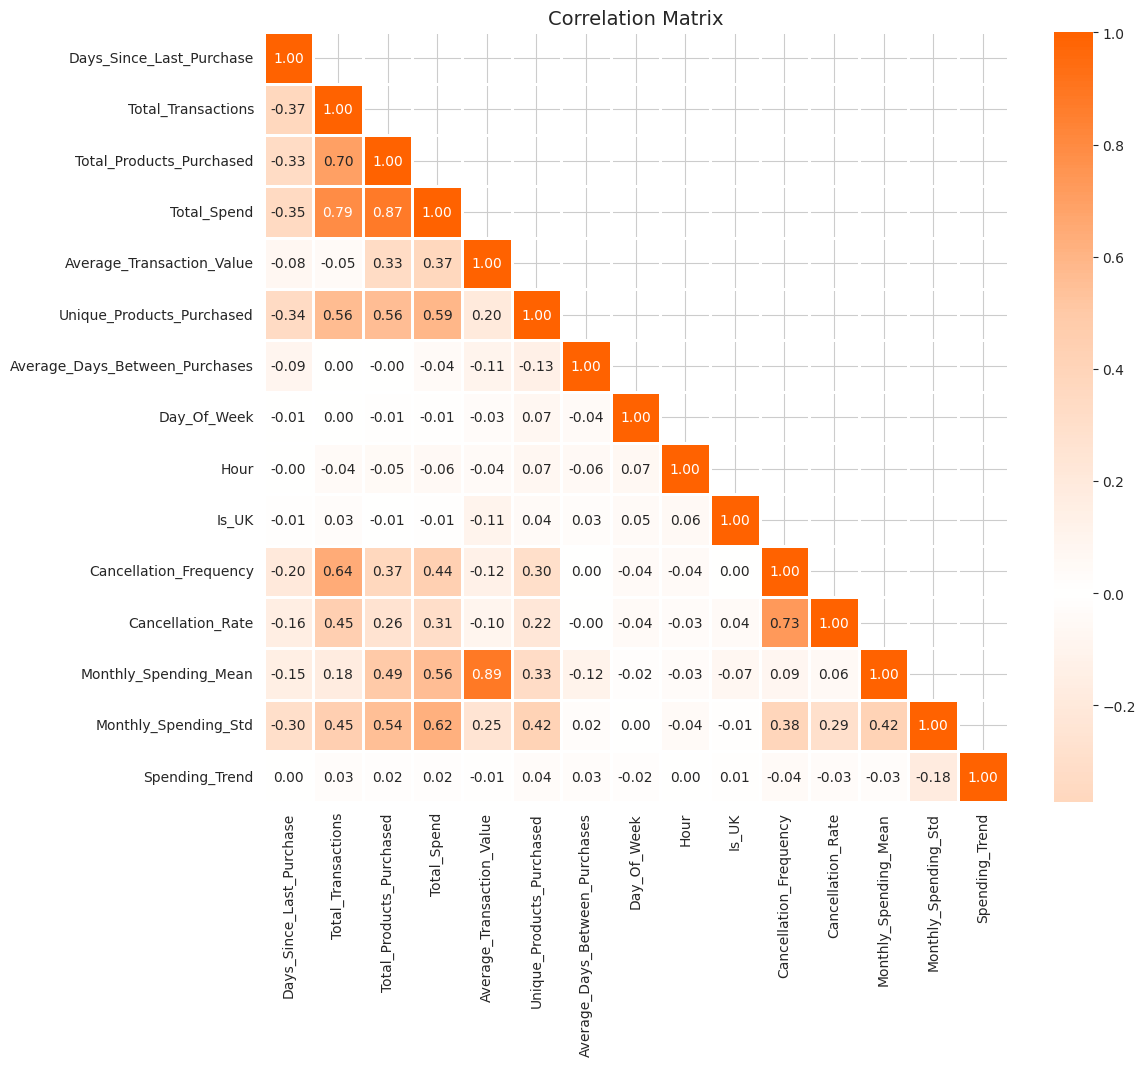

In [57]:
from matplotlib.colors import LinearSegmentedColormap

# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

**Inference:**
Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

1. Monthly_Spending_Mean and
Average_Transaction_Value

2. Total_Spend and Total_Products_Purchased

3. Total_Transactions and Total_Spend

4. Cancellation_Rate and Cancellation_Frequency

5. Total_Transactions and Total_Products_Purchased

These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

.

.

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process



# Feature Scaling

Sebelum melanjutkan pengelompokan dan pengurangan dimensi, penting untuk menskalakan fitur kami. Langkah ini mempunyai arti penting, terutama dalam konteks algoritma berbasis jarak seperti K-means dan metode pengurangan dimensi seperti PCA. Inilah alasannya:

1. **K-means Clustering**: K-means sangat mengandalkan konsep 'jarak' antar titik data untuk membentuk cluster. Jika fitur tidak berada pada skala yang sama, fitur dengan nilai yang lebih besar dapat mempengaruhi hasil pengelompokan secara tidak proporsional, sehingga berpotensi menyebabkan pengelompokan yang salah.

2. **PCA**: PCA bertujuan untuk menemukan arah dimana datanya paling bervariasi. Jika fitur tidak diskalakan, fitur dengan nilai lebih besar mungkin akan mendominasi komponen tersebut, sehingga tidak mencerminkan pola dasar data secara akurat.

.

.

.

**Metodologi:**

Oleh karena itu, untuk memastikan pengaruh yang seimbang pada model dan untuk mengungkap pola sebenarnya dalam data, saya akan menstandarkan data kita, yang berarti mengubah fitur agar memiliki rata-rata 0 dan deviasi standar 1. Namun, tidak semua fitur memerlukan penskalaan. Berikut pengecualian dan alasan pengecualiannya:

1. ID Pelanggan: Fitur ini hanyalah pengidentifikasi untuk pelanggan dan tidak berisi informasi berarti untuk pengelompokan.

2. Is_UK: Ini adalah fitur biner yang menunjukkan apakah pelanggan berasal dari Inggris atau tidak. Karena sudah mengambil nilai 0 atau 1, menskalakannya tidak akan membuat perbedaan yang signifikan.

3. Day_Of_Week: Fitur ini mewakili hari yang paling sering dilakukan pelanggan dalam seminggu. Karena ini adalah fitur kategorikal yang diwakili oleh bilangan bulat (1 hingga 7), penskalaannya tidak diperlukan.

Saya akan melanjutkan untuk menskalakan fitur-fitur lain dalam kumpulan data untuk mempersiapkannya untuk pengelompokan PCA dan K-means.

In [58]:
customer_data_cleaned

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,277,1,45,180.6,180.6,10,0.0,0,9,1,0,0.0,180.6,0.0,0.0
4063,18281.0,180,1,54,80.82,80.82,7,0.0,6,10,1,0,0.0,80.82,0.0,0.0
4064,18282.0,7,3,98,176.6,58.866667,12,9.916667,4,13,1,1,0.142857,88.3,14.792674,-20.92
4065,18283.0,3,16,1355,2039.58,127.47375,262,0.465181,3,14,1,0,0.0,203.958,165.798738,22.319273


In [59]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868


# Dimensionality Reduction

Mengapa Kita Membutuhkan Pengurangan Dimensi?

1. **Multicollinearity Detected**: Pada langkah sebelumnya, kami mengidentifikasi bahwa kumpulan data kami berisi fitur multikolinear. Pengurangan dimensi dapat membantu kita menghilangkan informasi yang berlebihan dan mengatasi masalah multikolinearitas.

2. **Better Clustering with K-means**: Karena K-means adalah algoritme berbasis jarak, memiliki sejumlah besar fitur terkadang dapat melemahkan pola dasar yang bermakna dalam data. Dengan mengurangi dimensi, kami dapat membantu K-means menemukan cluster yang lebih kompak dan terpisah dengan baik.

3. **Noise Reduction**: Dengan hanya berfokus pada fitur yang paling penting, kami berpotensi menghilangkan noise dalam data, sehingga menghasilkan cluster yang lebih akurat dan stabil.

4. **Enhanced Visualization**: Dalam konteks segmentasi pelanggan, kemampuan memvisualisasikan kelompok pelanggan dalam dua atau tiga dimensi dapat memberikan wawasan intuitif. Teknik reduksi dimensi dapat memfasilitasi hal ini dengan mereduksi data menjadi beberapa komponen utama yang dapat diplot dengan mudah.

5. **Improved Computational Efficiency**: Mengurangi jumlah fitur dapat mempercepat waktu komputasi selama proses pemodelan, menjadikan algoritme pengelompokan kami lebih efisien.

Mari kita lanjutkan memilih metode reduksi dimensi yang sesuai untuk data kita.

**Metode Reduksi Dimensi yang Mana?**

Pada langkah ini, kami mempertimbangkan penerapan teknik reduksi dimensi untuk menyederhanakan data sambil tetap mempertahankan informasi penting. Di antara berbagai metode seperti KernelPCA, ICA, ISOMAP, TSNE, dan UMAP, saya memulai dengan **PCA (Principal Component Analysis)**. Inilah alasannya:

PCA adalah titik awal yang sangat baik karena berfungsi dengan baik dalam menangkap hubungan linier dalam data, yang sangat relevan mengingat multikolinearitas yang kami identifikasi dalam kumpulan data kami. Hal ini memungkinkan kami mengurangi jumlah fitur dalam kumpulan data sambil tetap mempertahankan sejumlah besar informasi, sehingga membuat analisis pengelompokan kami berpotensi lebih akurat dan dapat diinterpretasikan. Selain itu, ini efisien secara komputasi, yang berarti tidak akan menambah waktu pemrosesan secara signifikan.

Namun, penting untuk diingat bahwa kami tetap membuka opsi. Setelah menerapkan PCA, jika kami menemukan bahwa beberapa komponen pertama tidak menangkap sejumlah besar varians, yang mengindikasikan hilangnya informasi penting, kami dapat mempertimbangkan untuk mengeksplorasi metode non-linier lainnya. Metode-metode ini berpotensi memberikan pendekatan yang lebih bernuansa terhadap pengurangan dimensi, menangkap pola-pola kompleks yang mungkin terlewatkan oleh PCA, meskipun dengan mengorbankan peningkatan waktu komputasi dan kompleksitas.

### **Methodology**
Saya akan menerapkan PCA pada semua komponen yang tersedia dan memplot varian kumulatif yang dijelaskan oleh komponen tersebut. Proses ini akan memungkinkan saya memvisualisasikan seberapa banyak varians yang dapat dijelaskan oleh setiap komponen utama tambahan, sehingga membantu saya menentukan jumlah optimal komponen yang perlu dipertahankan untuk analisis:

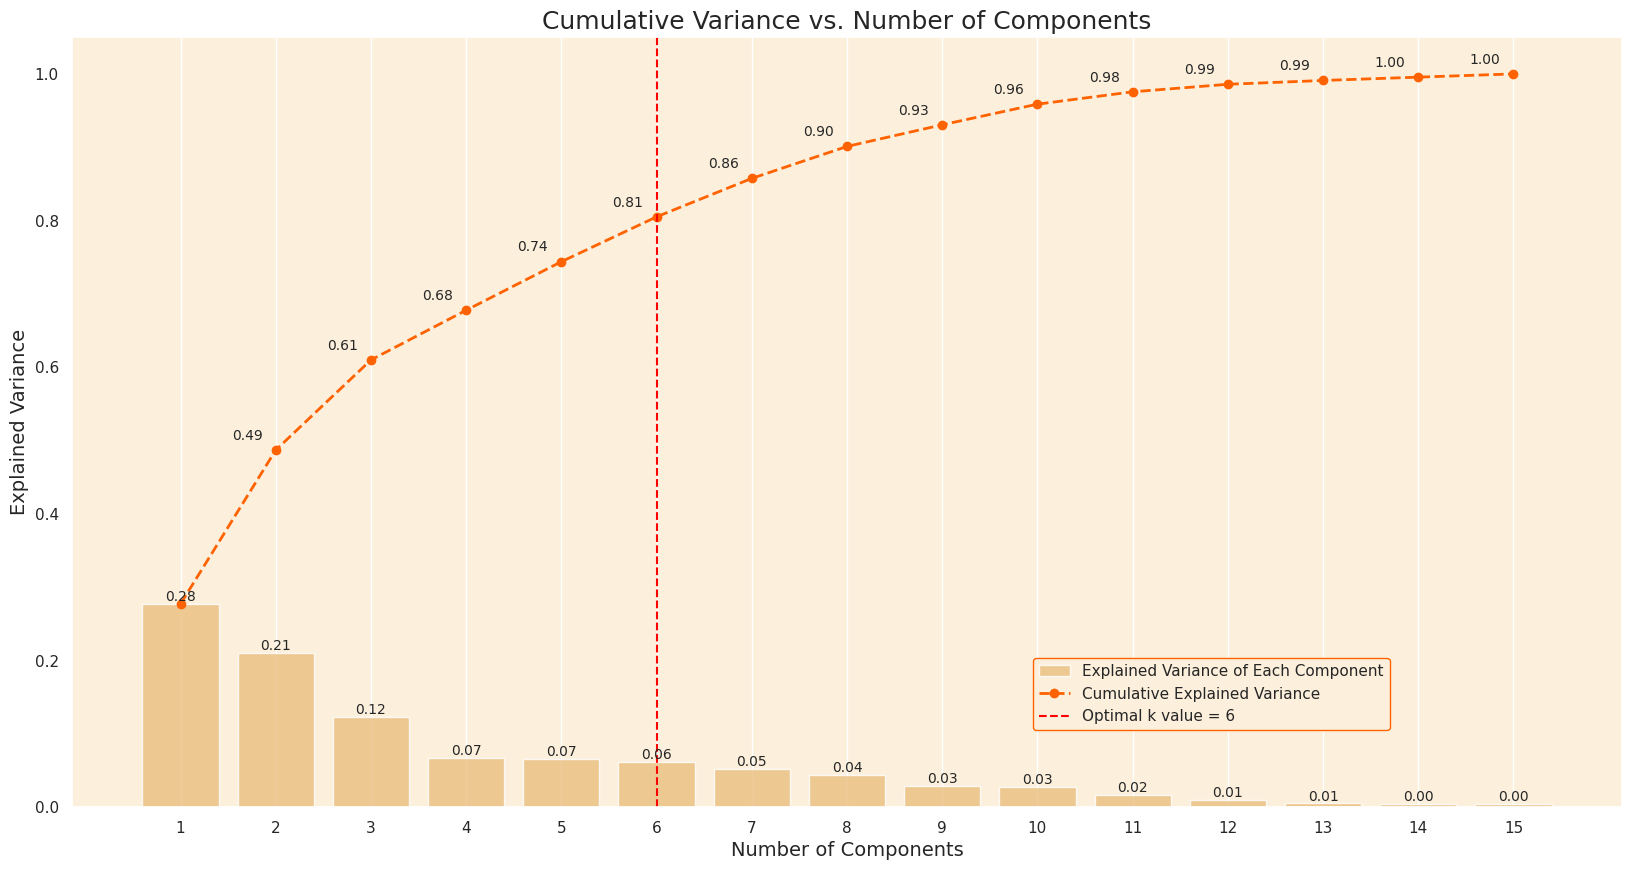

In [60]:
from sklearn.decomposition import PCA

# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

**Kesimpulan **
Plot dan nilai varians yang dijelaskan secara kumulatif menunjukkan seberapa banyak total varians dalam kumpulan data yang ditangkap oleh masing-masing komponen utama, serta varians kumulatif yang dijelaskan oleh n komponen pertama.

Di sini, kita dapat mengamati bahwa:

1. Komponen pertama menjelaskan sekitar 28% varians.

2. Dua komponen pertama bersama-sama menjelaskan sekitar 49% varians.

3. Tiga komponen pertama menjelaskan sekitar 61% varians, dan seterusnya.

Untuk memilih jumlah komponen yang optimal, kita biasanya mencari titik di mana penambahan komponen lain tidak meningkatkan variansi kumulatif yang dijelaskan secara signifikan, yang sering disebut sebagai "titik siku" pada kurva.

Dari plot tersebut, kita dapat melihat bahwa peningkatan varians kumulatif mulai melambat setelah komponen ke-6 (yang mencakup sekitar 81% dari total varians).

Mempertimbangkan konteks segmentasi pelanggan, kami ingin menyimpan informasi dalam jumlah yang cukup untuk mengidentifikasi kelompok pelanggan yang berbeda secara efektif. Oleh karena itu, mempertahankan 6 komponen pertama mungkin merupakan pilihan yang seimbang, karena keduanya menjelaskan sebagian besar varians total sekaligus mengurangi dimensi kumpulan data.

In [61]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [62]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672


Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [63]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,-0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,-0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,-0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,-0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,-0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,-0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,-0.013419,-0.005353,0.014384


# K-Means Clustering

K-Means is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the within-cluster sum-of-squares (WCSS), also known as inertia. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

Drawbacks of K-Means:
Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

1️⃣ Inertia is influenced by the number of dimensions: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.
Solution: Performing dimensionality reduction, such as PCA, before applying K-means to alleviate this issue and speed up computations.

2️⃣ Dependence on Initial Centroid Placement: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.
Solution: To enhance the likelihood of locating the global minimum, we can employ the k-means++ initialization method.

3️⃣ Requires specifying the number of clusters: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.
Solution: Using methods such as the elbow method and silhouette analysis to estimate the optimal number of clusters.

4️⃣ Sensitivity to unevenly sized or sparse clusters: K-means might struggle with clusters of different sizes or densities.
Solution: Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.

5️⃣ Assumes convex and isotropic clusters: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.

Solution: Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).

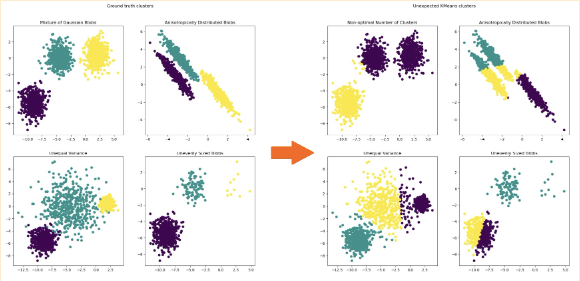


Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the init parameter to k-means++ and n_init to 10. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

# Determining the Optimal Number of Clusters

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

1. Elbow Method

2. Silhouette Method

It's common to utilize both methods in practice to corroborate the results.

### Elbow Method
What is the Elbow Method?
The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "Elbow Method". The elbow point represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

.

Utilizing the YellowBrick Library

In this section, I will employ the YellowBrick library to facilitate the implementation of the Elbow method. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

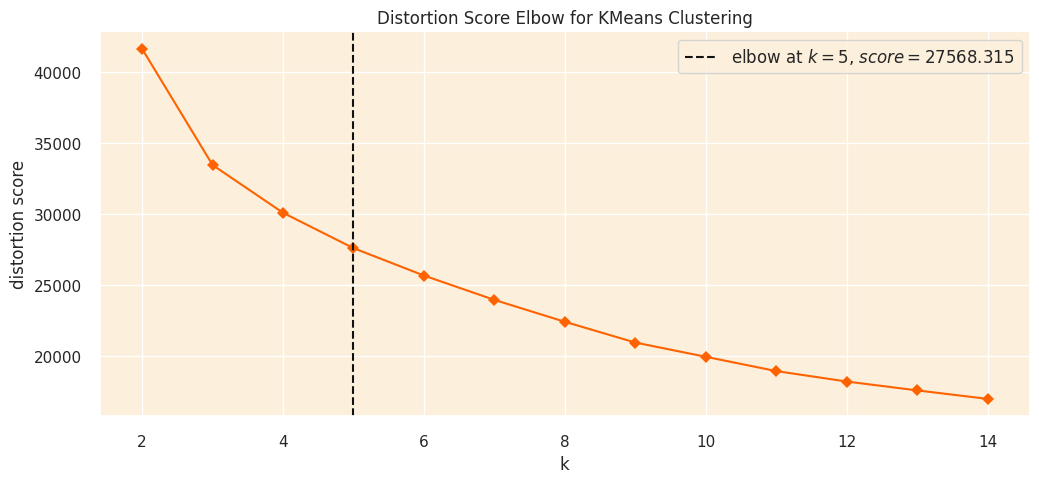

In [64]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

Optimal k Value: Elbow Method Insights

The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

### Silhouette
What is the Silhouette Method?

The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the silhouette coefficient for each data point, which measures how similar a point is to its own cluster compared to other clusters.

Methodology
In the following analysis:

I will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot Silhouette scores for each k value to determine the one with the highest score.
Subsequently, to fine-tune the selection of the most appropriate k, I will generate Silhouette plots that visually display the silhouette coefficients for each data point within various clusters.
The YellowBrick library will be utilized once again to create these plots and facilitate a comparative analysis.

In [65]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

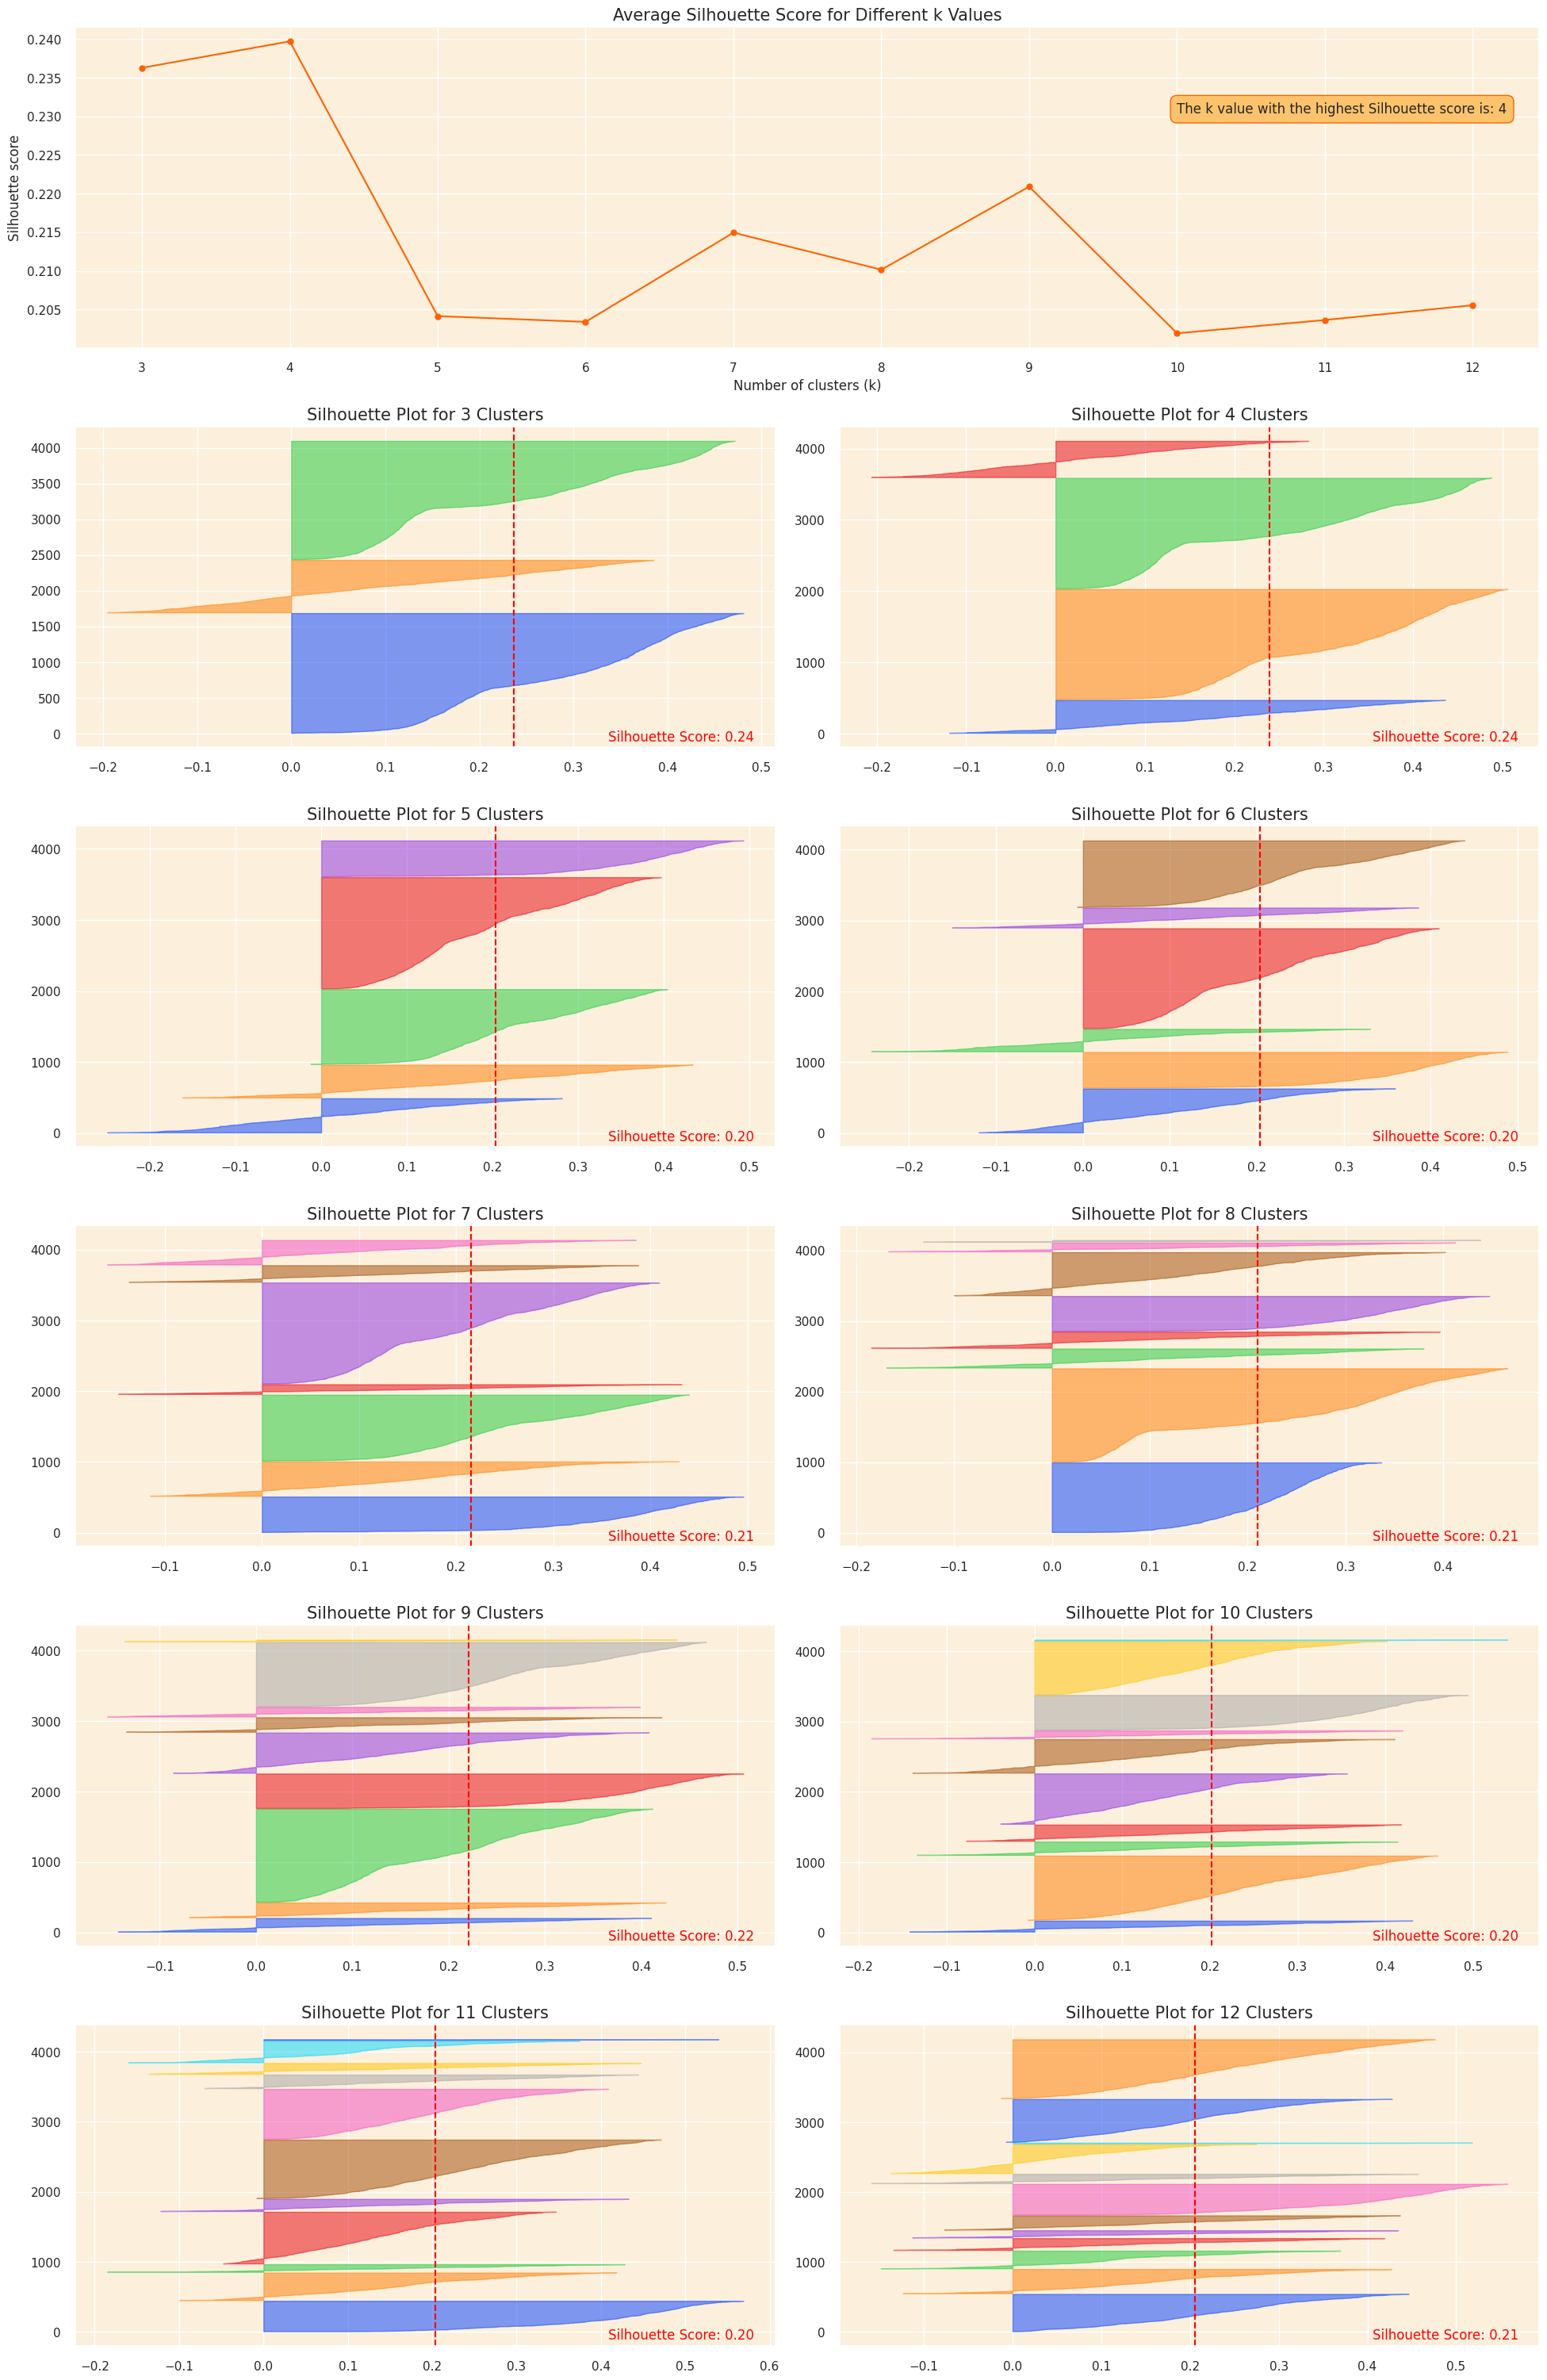

In [66]:
import matplotlib.gridspec as gridspec
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

**Optimal k Value: Silhouette Method Insights**

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing ( k = 3 ) is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

# Clustering Model - K-means

In this step, I am going to apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [67]:
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [68]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,2
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1


# Clustering Evaluation

After determining the optimal number of clusters (which is 3 in our case) using elbow and silhouette analyses, I move onto the evaluation step to assess the quality of the clusters formed. This step is essential to validate the effectiveness of the clustering and to ensure that the clusters are coherent and well-separated. The evaluation metrics and a visualization technique I plan to use are outlined below:

1️⃣ 3D Visualization of Top PCs

2️⃣ Cluster Distribution Visualization

3️⃣ Evaluation Metrics

Silhouette Score
Calinski Harabasz Score
Davies Bouldin Score

**Note**: We are using the PCA version of the dataset for evaluation because this is the space where the clusters were actually formed, capturing the most significant patterns in the data. Evaluating in this space ensures a more accurate representation of the cluster quality, helping us understand the true cohesion and separation achieved during clustering. This approach also aids in creating a clearer 3D visualization using the top principal components, illustrating the actual separation between clusters.

### 3D Visualization of Top Principal Components
In this part, I am going to choose the top 3 PCs (which capture the most variance in the data) and use them to create a 3D visualization. This will allow us to visually inspect the quality of separation and cohesion of clusters to some extent:

In [69]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

In [70]:
import plotly.graph_objects as go

# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

### Cluster Distribution Visualization
I am going to utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant:

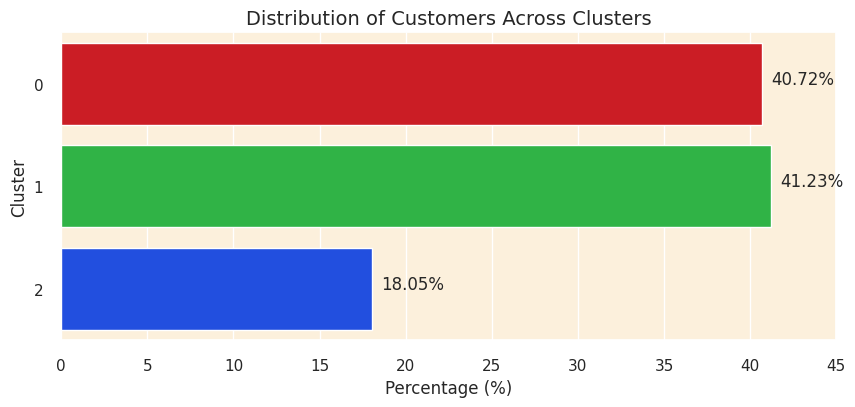

In [71]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

**Inference**

The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 0 and 1 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers.

This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.

## Evaluation Metrics

To further scrutinize the quality of our clustering, I will employ the following metrics:

1. Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.

2. Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

3. Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [72]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from tabulate import tabulate

# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+---------------------+
|         Metric          |        Value        |
+-------------------------+---------------------+
| Number of Observations  |        4067         |
|    Silhouette Score     | 0.23627137022779893 |
| Calinski Harabasz Score | 1257.1794962921545  |
|  Davies Bouldin Score   | 1.3684055372996031  |
+-------------------------+---------------------+


Inferensi Kualitas Pengelompokan

1. Skor Siluet sekitar 0,236, meskipun tidak mendekati 1, masih menunjukkan cukup besarnya jarak antar cluster. Hal ini menunjukkan bahwa cluster-cluster tersebut agak berbeda, namun mungkin ada sedikit tumpang tindih di antara mereka. Secara umum, skor yang mendekati 1 adalah nilai ideal, yang menunjukkan kelompok yang lebih berbeda dan terpisah dengan baik.

2. Skor Calinski Harabasz adalah 1257,17, yang tergolong tinggi, yang menunjukkan bahwa cluster-cluster tersebut terdefinisi dengan baik. Skor yang lebih tinggi pada metrik ini umumnya menandakan definisi cluster yang lebih baik, sehingga menyiratkan bahwa clustering kami telah berhasil menemukan struktur substansial dalam data.

3. Skor Davies Bouldin sebesar 1,37 merupakan skor yang wajar, menunjukkan tingkat kemiripan yang sedang antara masing-masing cluster dengan cluster yang paling mirip. Skor yang lebih rendah umumnya lebih baik karena menunjukkan lebih sedikit kesamaan antar cluster, dan dengan demikian, skor kami di sini menunjukkan pemisahan yang layak antar cluster.

Kesimpulannya, metrik tersebut menunjukkan bahwa pengelompokan memiliki kualitas yang baik, dengan kelompok-kelompok yang terdefinisi dengan baik dan terpisah secara adil. Namun, mungkin masih ada ruang untuk optimasi lebih lanjut guna meningkatkan pemisahan dan definisi cluster, mungkin dengan mencoba algoritma pengelompokan dan pengurangan dimensi lainnya.


# Cluster Analysis and Profiling
Pada bagian ini, saya akan menganalisis karakteristik setiap cluster untuk memahami perilaku dan preferensi yang berbeda dari segmen pelanggan yang berbeda dan juga membuat profil setiap cluster untuk mengidentifikasi ciri-ciri utama yang mendefinisikan pelanggan di setiap cluster.

## Radar Chart Approach
Pertama-tama, saya akan membuat bagan radar untuk memvisualisasikan nilai pusat massa setiap cluster di berbagai fitur. Hal ini dapat memberikan perbandingan visual yang cepat dari profil cluster yang berbeda. Untuk membuat grafik radar, penting untuk terlebih dahulu menghitung pusat massa untuk setiap cluster. Pusat massa ini mewakili nilai rata-rata untuk semua fitur dalam cluster tertentu. Selanjutnya, saya akan menampilkan centroid ini pada grafik radar, memfasilitasi visualisasi yang jelas tentang kecenderungan sentral setiap fitur di berbagai cluster:

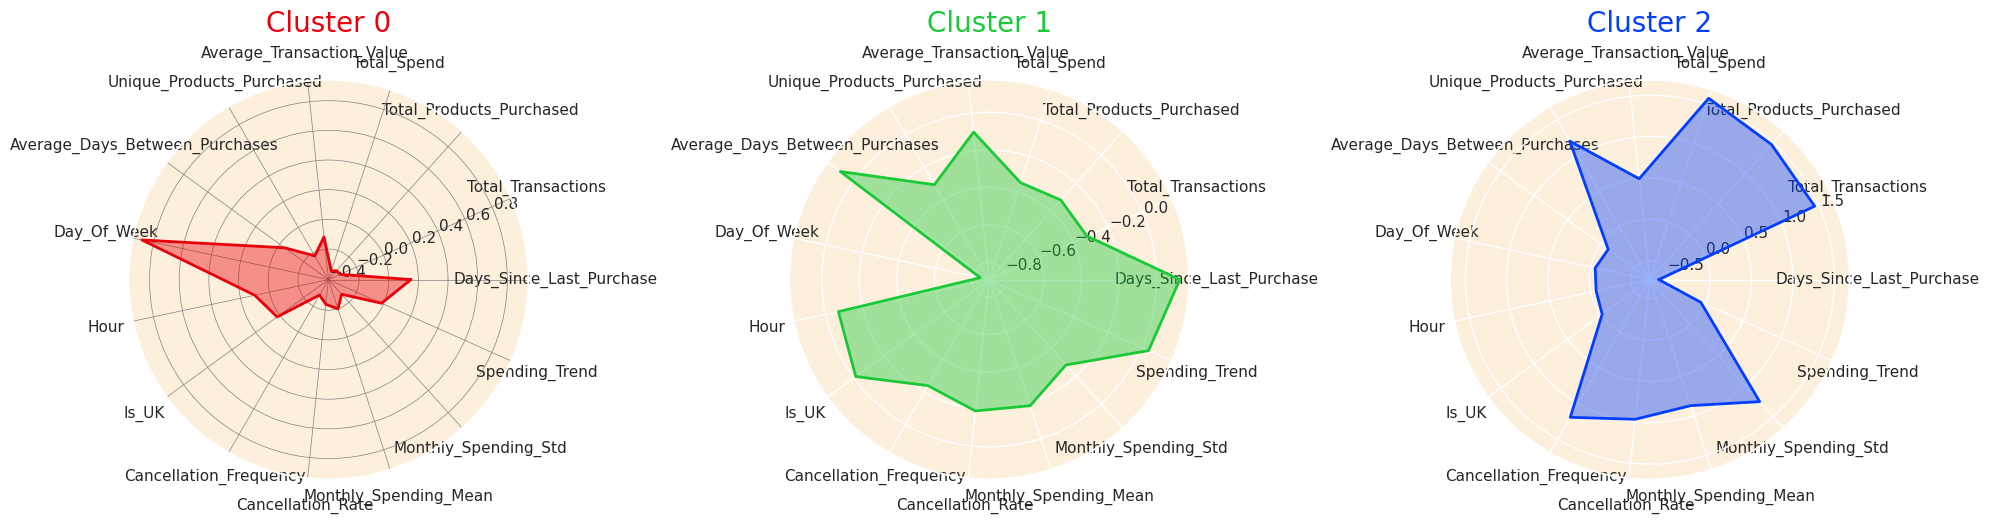

In [73]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

# Profil Pelanggan Berasal dari Analisis Grafik Radar
**Cluster 0 (Grafik Merah):**

🎯 Profil: Pembeli Sporadis dengan Preferensi Belanja Akhir Pekan

1. Pelanggan di cluster ini cenderung berbelanja lebih sedikit, dengan jumlah transaksi dan pembelian produk yang lebih sedikit.

2. Mereka memiliki sedikit kecenderungan untuk berbelanja pada akhir pekan, hal ini terlihat dari nilai Day_of_Week yang sangat tinggi.

3. Tren pembelanjaan mereka relatif stabil namun berada pada sisi yang lebih rendah, dan mereka memiliki variasi pembelanjaan bulanan yang rendah (low Monthly_Spending_Std).

4. Pelanggan ini tidak melakukan banyak pembatalan, sehingga menunjukkan frekuensi dan tarif pembatalan yang rendah.

5. Nilai transaksi rata-rata berada di sisi bawah, yang menunjukkan bahwa ketika mereka berbelanja, mereka cenderung mengeluarkan lebih sedikit uang per transaksi.

**Cluster 1 (Grafik Hijau):**

🎯 Profil: Jarang Pembelanja Besar dengan Tren Pembelanjaan Tinggi

1. Pelanggan di klaster ini menunjukkan tingkat pembelanjaan yang moderat, namun transaksi mereka tidak terlalu sering, seperti yang ditunjukkan oleh tingginya Days_Since_Last_Purchase dan Average_Days_Between_Purchases.

2. Mereka mempunyai tren pembelanjaan yang sangat tinggi, yang menunjukkan bahwa pembelanjaan mereka terus meningkat dari waktu ke waktu.

3. Pelanggan ini lebih suka berbelanja di sore hari, seperti yang ditunjukkan oleh nilai Hour yang tinggi, dan sebagian besar mereka tinggal di the UK.

4. Mereka mempunyai kecenderungan untuk membatalkan transaksi dalam jumlah sedang, dengan frekuensi dan tingkat pembatalan yang sedang.

5. Rata-rata nilai transaksi mereka relatif tinggi, artinya ketika mereka berbelanja, mereka cenderung melakukan pembelian dalam jumlah besar.

**Cluster 2 (Bagan Biru):**

🎯 Profil: Sering Berbelanja Tinggi dengan Tingkat Pembatalan Tinggi

1. Pelanggan dalam cluster ini adalah pelanggan dengan pembelanjaan tinggi dengan total pembelanjaan yang sangat tinggi, dan mereka membeli berbagai macam produk unik.

2. Mereka sering melakukan transaksi, namun juga memiliki frekuensi dan tingkat pembatalan yang tinggi.

3. Pelanggan ini memiliki waktu rata-rata antar pembelian yang sangat rendah, dan mereka cenderung berbelanja di pagi hari (nilai Hour rendah).

4. Pengeluaran bulanan mereka menunjukkan variabilitas yang tinggi, yang menunjukkan bahwa pola pengeluaran mereka mungkin kurang dapat diprediksi dibandingkan dengan kelompok lain.

5. Meskipun pengeluaran mereka tinggi, mereka menunjukkan tren pengeluaran yang rendah, yang menunjukkan bahwa tingkat pengeluaran mereka yang tinggi mungkin akan menurun seiring berjalannya waktu.

## Histogram Chart Approach
Untuk memvalidasi profil yang diidentifikasi dari grafik radar, kita dapat memplot histogram untuk setiap fitur yang disegmentasi berdasarkan label cluster. Histogram ini akan memungkinkan kita memeriksa secara visual distribusi nilai fitur dalam setiap cluster, sehingga mengonfirmasi atau menyempurnakan profil yang telah kita buat berdasarkan grafik radar.

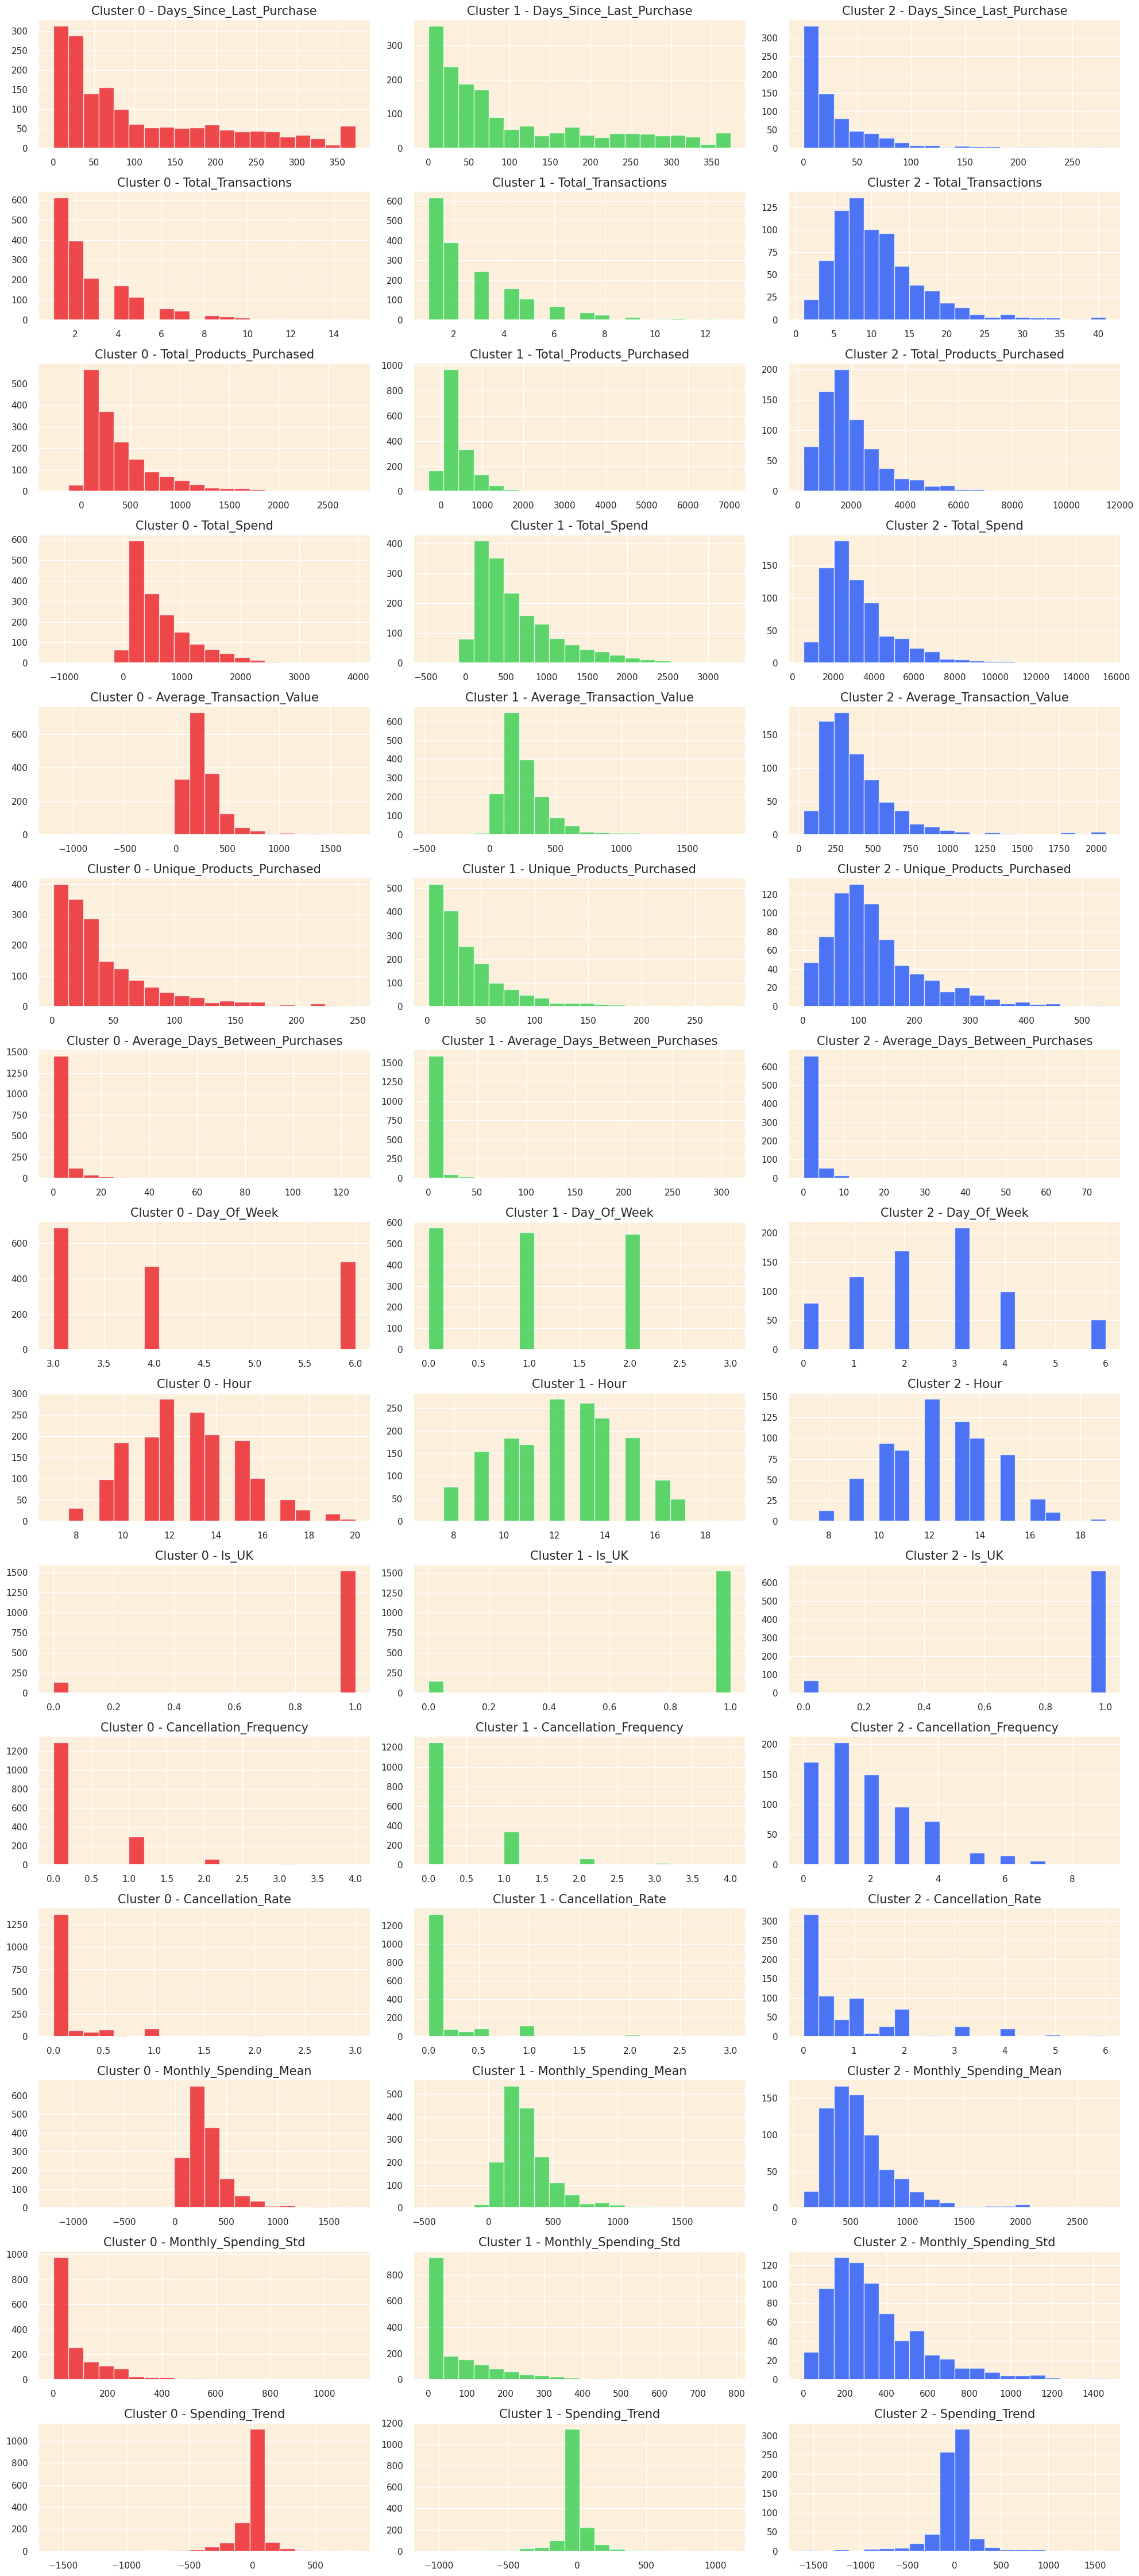

In [74]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

Wawasan mendetail dari histogram memberikan pemahaman yang lebih mendalam tentang setiap cluster, membantu menyempurnakan profil untuk mewakili perilaku pelanggan dengan lebih akurat. Berdasarkan analisis mendetail dari grafik radar dan histogram, berikut adalah profil dan judul yang disempurnakan untuk setiap cluster:

**Cluster 0 - Pembeli Santai Akhir Pekan:**
.
1. Pelanggan di cluster ini biasanya lebih jarang berbelanja dan menghabiskan lebih sedikit uang dibandingkan cluster lainnya.

2. Mereka umumnya memiliki jumlah transaksi yang lebih sedikit dan membeli lebih sedikit produk.

3. Pelanggan ini memiliki preferensi untuk berbelanja di akhir pekan, mungkin melakukan belanja santai atau window shopping.

4. Kebiasaan belanja mereka cukup stabil dari waktu ke waktu, dan tidak menunjukkan sedikit fluktuasi dalam pengeluaran bulanan mereka.

5. Mereka jarang membatalkan transaksinya, hal ini menunjukkan perilaku belanja yang lebih tegas.

6. Saat mereka berbelanja, pengeluaran per transaksi mereka cenderung lebih rendah dibandingkan klaster lainnya.

**Cluster 1 - Pembelanjaan Besar Sesekali:**

1. Pelanggan dalam kelompok ini tidak sering berbelanja namun cenderung menghabiskan banyak uang untuk membeli berbagai produk.

2. Pengeluaran mereka meningkat, yang menunjukkan meningkatnya minat atau investasi dalam pembelian mereka.
3. Mereka lebih suka berbelanja di sore hari, mungkin setelah jam kerja, dan sebagian besar berbasis di Inggris.

4. Mereka mempunyai kecenderungan moderat untuk membatalkan transaksi, hal ini mungkin disebabkan oleh tingginya pengeluaran mereka; mereka mungkin lebih sering mempertimbangkan kembali pembelian mereka.

5. Pembelian mereka umumnya dalam jumlah besar, yang menunjukkan preferensi terhadap produk berkualitas atau premium.

**cluster 2 - Pembeli Awal yang Bersemangat:**

1. Pelanggan dalam klaster ini dicirikan oleh kebiasaan belanja mereka yang tinggi.Mereka cenderung membeli beragam produk unik dan melakukan banyak transaksi.

2. Meskipun pengeluaran mereka tinggi, mereka mempunyai kecenderungan untuk membatalkan sebagian besar transaksi mereka, hal ini mungkin mengindikasikan perilaku pembelian impulsif.

3. Mereka biasanya berbelanja pada dini hari, mungkin meluangkan waktu sebelum melakukan komitmen sehari-hari atau memanfaatkan penawaran awal.

4. Pola belanja mereka cukup bervariasi, dengan fluktuasi belanja bulanan yang tinggi, yang menunjukkan pola belanja yang kurang dapat diprediksi.

5. Menariknya, tren belanja mereka menunjukkan sedikit penurunan, yang mungkin menandakan perubahan kebiasaan belanja mereka di masa depan.



# Recommendation System
Pada tahap akhir proyek ini, saya siap mengembangkan sistem rekomendasi untuk meningkatkan pengalaman belanja online. Sistem ini akan menyarankan produk kepada pelanggan berdasarkan pola pembelian yang lazim di cluster masing-masing. Di awal proyek, selama tahap persiapan data pelanggan, saya mengisolasi sebagian kecil (5%) pelanggan yang diidentifikasi sebagai outlier dan menyimpannya dalam kumpulan data terpisah yang disebut outliers_data.

Sekarang, dengan fokus pada 95% inti kelompok pelanggan, saya menganalisis data pelanggan yang telah dibersihkan untuk menentukan produk terlaris dalam setiap cluster. Dengan memanfaatkan informasi ini, sistem akan membuat rekomendasi yang dipersonalisasi, menyarankan tiga produk terpopuler dalam cluster mereka yang belum mereka beli. Hal ini tidak hanya memfasilitasi strategi pemasaran yang ditargetkan tetapi juga memperkaya pengalaman berbelanja pribadi, sehingga berpotensi meningkatkan penjualan. Untuk kelompok outlier, pendekatan dasarnya adalah dengan merekomendasikan produk secara acak, sebagai titik awal untuk melibatkan mereka.

In [75]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Create a record of products purchased by each customer in each cluster
customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

# Step 6: Generate recommendations for each customer in each cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        # Identify products already purchased by the customer
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) &
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()

        # Find top 3 products in the best-selling list that the customer hasn't purchased yet
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)

        # Append the recommendations to the list
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

# Step 7: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [76]:
# Display 10 random rows from the customer_data_with_recommendations dataframe
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

,Rec1_StockCode,Rec1_Description,Rec2_StockCode,Rec2_Description,Rec3_StockCode,Rec3_Description
CustomerID,,,,,,
15746.0,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN,85123A,WHITE HANGING HEART T-LIGHT HOLDER
15728.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17459.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
17415.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
15339.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14335.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
15367.0,22616,PACK OF 12 LONDON TISSUES,84879,ASSORTED COLOUR BIRD ORNAMENT,16014,SMALL CHINESE STYLE SCISSOR
17604.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
17828.0,22616,PACK OF 12 LONDON TISSUES,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,85099B,JUMBO BAG RED RETROSPOT
